# Fake News Detection

## Exploratory data analysis 

**Project Description**

The spread of fake news has become a major concern in today’s society, and it is important to be able to identify news articles that are not based on facts or are intentionally misleading. In this project, we will use machine learning to classify news articles as either real or fake based on their content. By identifying fake news articles, we can prevent the spread of misinformation and help people make more informed decisions.

This project is relevant to the media industry, news outlets, and social media platforms that are responsible for sharing news articles. Classifying news articles as real or fake can help these organizations improve their content moderation and reduce the spread of fake news.

**Problem Statement**

This project aims to classify news articles as real or fake based on their content. Specifically, we will use machine learning to build a model to predict whether a given news article is real or fake based on its text.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from textblob import TextBlob

### Loading the dataset

In [2]:
data = pd.read_csv(r'C:\Users\Dell\Desktop\project presentation\Dataset\train.csv')
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


__Dataset Description__ 

* id: unique id for a news article 

* title: the title of a news article 

* author: author of the news article 

* text: the text of the article could be incomplete 

* label: a label that marks the article as potentially unreliable 

    * 1: unreliable (fake) 
    * 0: reliable (real) 

In [3]:
df = data.copy()

In [4]:
df = df.drop('id',axis=1)

### Understanding the Data

In [5]:
df.columns

Index(['title', 'author', 'text', 'label'], dtype='object')

In [6]:
df.shape

(20800, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   20242 non-null  object
 1   author  18843 non-null  object
 2   text    20761 non-null  object
 3   label   20800 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 650.1+ KB


In [8]:
df.describe()

,label
count,20800.000000
mean,0.500625
std,0.500012
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [9]:
df.isnull().sum()

title      558
author    1957
text        39
label        0
dtype: int64

In [10]:
df['title'].fillna('  ', inplace=True)
df['author'].fillna('Unknown', inplace=True)
df['text'].fillna('  ', inplace=True)

### Target Variable Distribution

In [11]:
# colour combination
custom_palette = ["#33A1FF","#FF5733"] 
sns.set_palette(custom_palette)

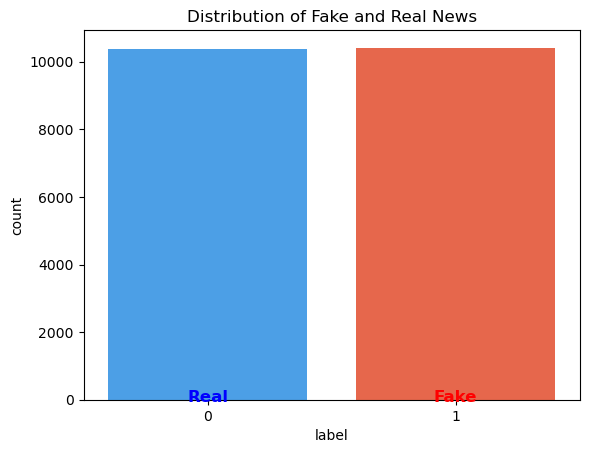

In [12]:
# Countplot
sns.countplot(x='label', data=df)
plt.text(1, -50, 'Fake', fontsize=12, color='red', fontweight='bold', ha='center')
plt.text(0, -50, 'Real', fontsize=12, color='blue', fontweight='bold', ha='center')
plt.title('Distribution of Fake and Real News')
plt.show()

In [13]:
label_counts = df['label'].value_counts().reset_index()
label_counts.columns = ['Label', 'Count']
print(label_counts)

   Label  Count
0      1  10413
1      0  10387


In [14]:
df.nunique()

title     19804
author     4202
text      20386
label         2
dtype: int64

__Number of fake news = 10413__  
__Number of real news = 10387__

### Source Analysis

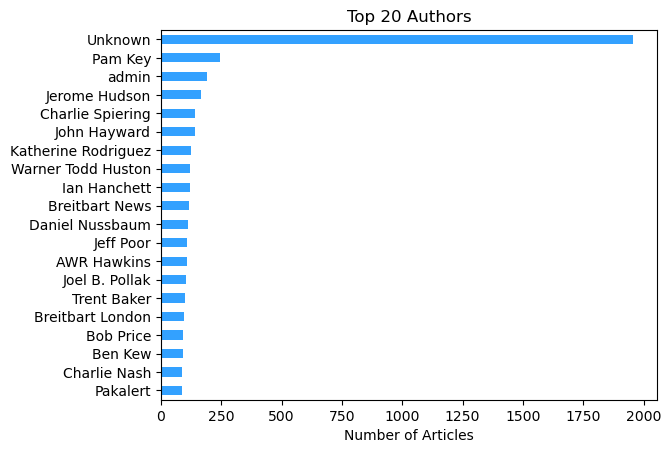

In [15]:
#Authors(Top 20):
df['author'].value_counts().head(20).sort_values(ascending=True).plot(kind='barh')
plt.title('Top 20 Authors')
plt.xlabel('Number of Articles')
plt.show()

In [16]:
df['author'].value_counts()

Unknown                                      1957
Pam Key                                       243
admin                                         193
Jerome Hudson                                 166
Charlie Spiering                              141
                                             ... 
Jeremy R. Hammond                               1
Vic Bishop                                      1
Douglas Martin                                  1
Najim Rahim and Fahim Abed                      1
Michael J. de la Merced and Rachel Abrams       1
Name: author, Length: 4202, dtype: int64

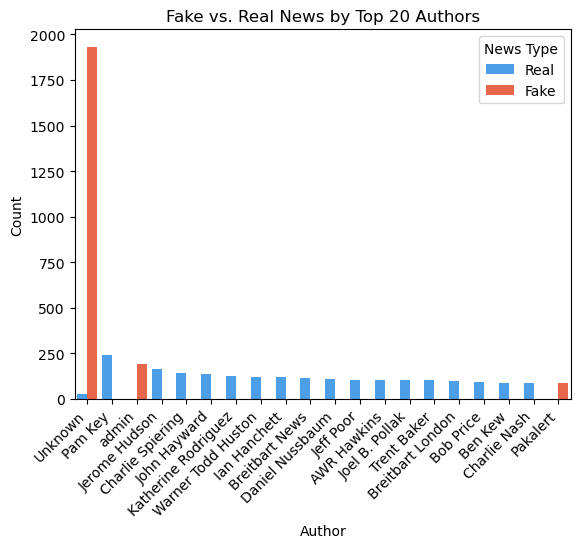

In [17]:
#Bar Plot of Target Labels vs. Authors(Top 20):
ax = sns.countplot(x='author', hue='label', data=df , palette=custom_palette, order=df['author'].value_counts().iloc[:20].index)

plt.title('Fake vs. Real News by Top 20 Authors')
plt.xlabel('Author')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

ax.legend(labels=['Real','Fake'], title='News Type')

plt.show()

### Text Analysis

In [18]:
df1 = df.copy()
df1['label'] = df1['label'].replace({0: 'Real', 1: 'Fake'})
df1.head()

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,Fake
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,Real
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",Fake
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,Fake
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,Fake


In [19]:
# Analyzing the length of news titles and news text
df1['title_length'] = df1['title'].apply(lambda x: len(str(x)))
df1['text_length'] = df1['text'].apply(lambda x: len(str(x)))
df1.head()

,title,author,text,label,title_length,text_length
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,Fake,81,4930
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,Real,55,4160
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",Fake,33,7692
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,Fake,63,3237
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,Fake,93,938


In [20]:
df1.describe()

,title_length,text_length
count,20800.000000,20800.000000
mean,72.379231,4544.182788
std,25.663810,5129.530465
min,2.000000,1.000000
25%,59.000000,1619.000000
50%,75.000000,3352.000000
75%,87.000000,6265.500000
max,456.000000,142961.000000


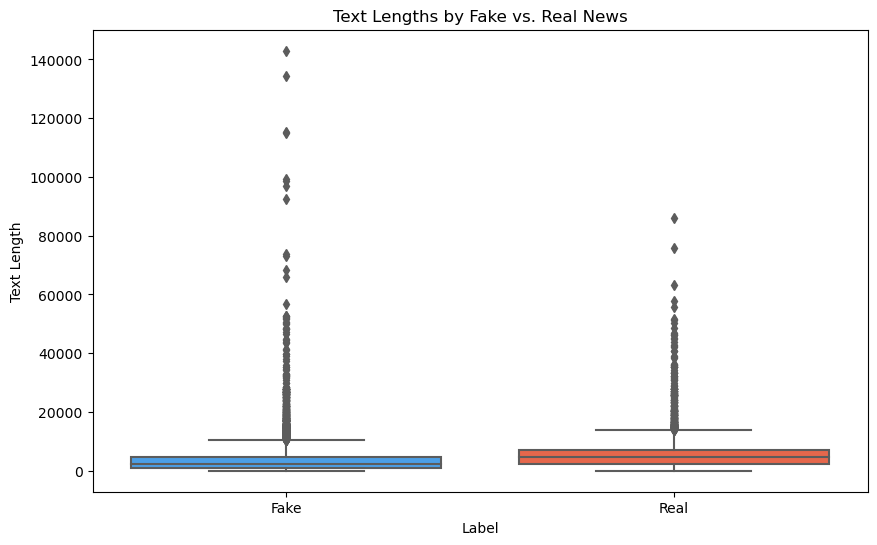

In [21]:
# Box plot of text lengths by target labels
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='text_length', palette=custom_palette, data=df1)
plt.title('Text Lengths by Fake vs. Real News')
plt.xlabel('Label')
plt.ylabel('Text Length')
plt.show()

__Conclusion__  
Fake news articles tend to be longer than real news articles, on average. However, there is a significant overlap between the two distributions, so text length alone is not a reliable indicator of whether a news article is fake or real. There is a wider range of text lengths for fake news articles than for real news articles. This suggests that there is more variability in the length of fake news articles, while real news articles tend to be more consistent in length. Some fake news articles are very long, much longer than any of the real news articles. This suggests that some fake news articles are deliberately designed to appear more credible by being longer and more detailed.  
 
Overall, the image suggests that text length is not a reliable indicator of whether a news article is fake or real. However, it may be one of several factors that can be used to help identify fake news.

## Preprocessing

In [22]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
import re
from nltk import tokenize
from nltk.stem import PorterStemmer

In [24]:
df3 = data.copy()

In [25]:
df3.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [26]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [27]:
df3.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [28]:
df3 = df3.fillna(' ')

In [29]:
df3.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

### Punctuation removal of text column

In [30]:
#Convert to String:
df3['text'] = df3['text'].apply(lambda x: str(x))

In [31]:
#convert to lower case 
df3['text'] = df3['text'].apply(lambda x: x.lower())

In [32]:
df3['text'] = df3['text'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))

In [33]:
df3[['text']]

,text
0,house dem aide we didn t even see comey s let...
1,ever get the feeling your life circles the rou...
2,why the truth might get you fired october ...
3,videos civilians killed in single us airstr...
4,print an iranian woman has been sentenced to ...
...,...
20795,rapper t i unloaded on black celebrities who...
20796,when the green bay packers lost to the washing...
20797,the macy s of today grew from the union of sev...
20798,nato russia to hold parallel exercises in bal...


### Stopwords removal

In [34]:
stop = stopwords.words('english')
df3['text'] = df3['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [35]:
df3[['text']]

,text
0,house dem aide even see comey letter jason cha...
1,ever get feeling life circles roundabout rathe...
2,truth might get fired october tension intellig...
3,videos civilians killed single us airstrike id...
4,print iranian woman sentenced six years prison...
...,...
20795,rapper unloaded black celebrities met donald t...
20796,green bay packers lost washington redskins wee...
20797,macy today grew union several great names amer...
20798,nato russia hold parallel exercises balkans pr...


label
0    10387
1    10374
Name: text, dtype: int64


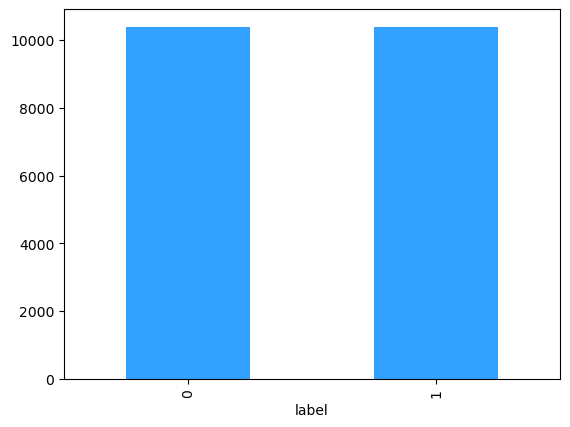

In [36]:
print(data.groupby(['label'])['text'].count())
data.groupby(['label'])['text'].count().plot(kind="bar")
plt.show()

### Tokenize of text column 

In [37]:
token_space = tokenize.WhitespaceTokenizer()

In [38]:
def counter(df3, column_text, quantity):
    all_words = ' '.join([str(text) for text in df3[column_text]])  # Combining all text in text col into a single string
    token_phrase = token_space.tokenize(all_words)  # Tokenizing the combined string into individual words
    frequency = nltk.FreqDist(token_phrase)  # Calculating the frequency distribution of tokens
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()), "Frequency": list(frequency.values())})  # Creating a DataFrame with word frequencies
    df_frequency = df_frequency.nlargest(columns="Frequency", n=quantity)  # Selecting the top 'quantity' words based on frequency

    # Plotting a bar graph
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=df_frequency, x="Word", y="Frequency", color='blue')
    ax.set(ylabel="Count")
    plt.xticks(rotation='vertical')
    plt.show()

    return df_frequency

In [39]:
df3.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,house dem aide even see comey letter jason cha...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,ever get feeling life circles roundabout rathe...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,truth might get fired october tension intellig...,1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,videos civilians killed single us airstrike id...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,print iranian woman sentenced six years prison...,1


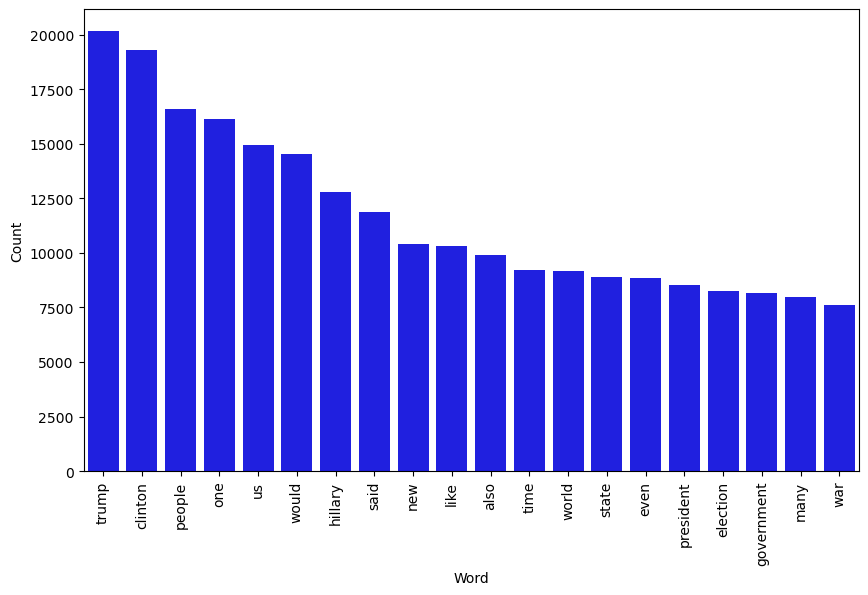

,Word,Frequency
1241,trump,20171
54,clinton,19297
397,people,16600
65,one,16128
500,us,14944
471,would,14555
53,hillary,12772
783,said,11875
1349,new,10401
40,like,10324


In [40]:
# fake words
counter(df3[df3["label"] == 1], "text", 20)

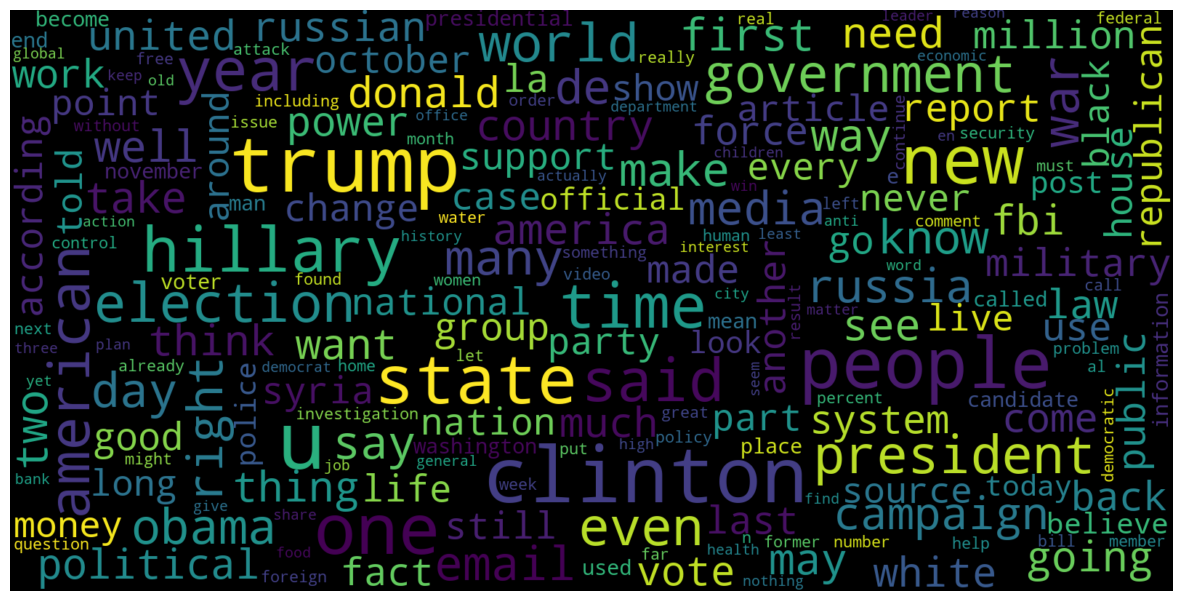

In [41]:
# Fake
from wordcloud import WordCloud
consolidated = ' '.join(
    word for word in df3['text'][df3['label'] == 1].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

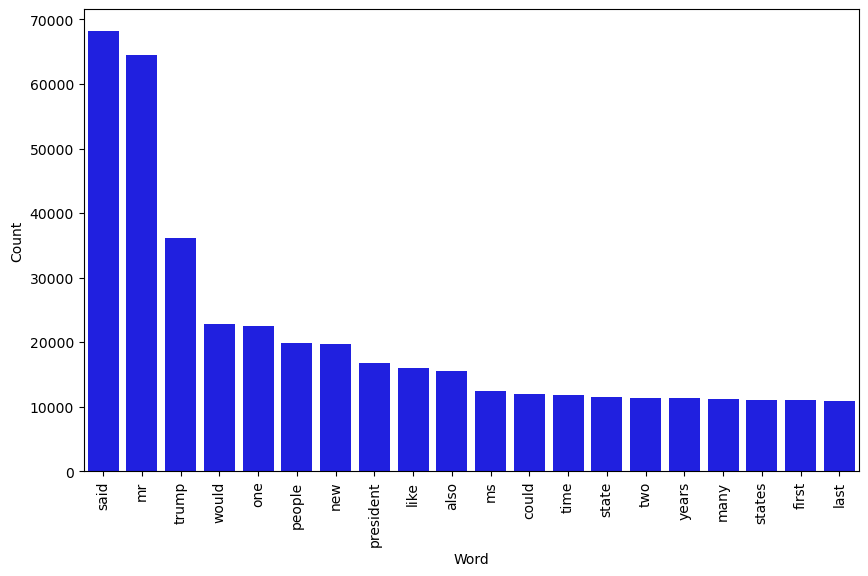

,Word,Frequency
151,said,68179
387,mr,64571
185,trump,36119
371,would,22803
144,one,22542
166,people,19942
132,new,19661
48,president,16829
60,like,16022
325,also,15527


In [42]:
# true 
counter(df3[df3["label"] == 0], "text", 20)

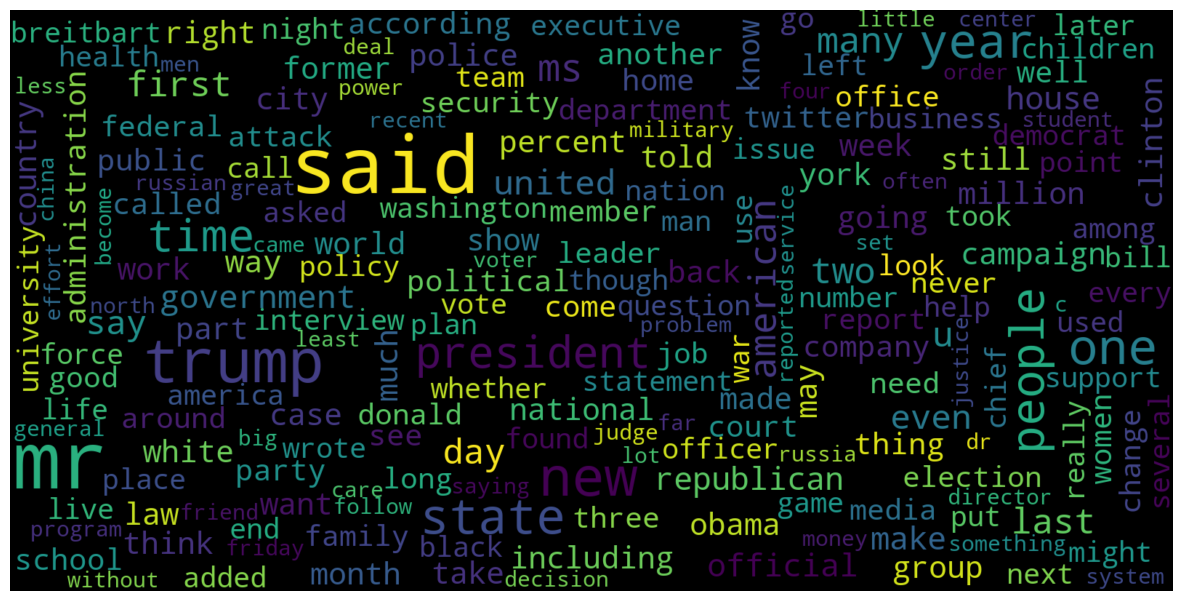

In [43]:
# Real
consolidated = ' '.join(
    word for word in df3['text'][df3['label'] == 0].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

In [44]:
port_stem = PorterStemmer()  # Creating an instance of the PorterStemmer

def stemming(content):
    # Stemming
    stemmed_content = [port_stem.stem(word) for word in content.split()]
    
    # Joining all stemmed words with a space
    stemmed_content = ' '.join(stemmed_content)
    
    return stemmed_content

In [45]:
print(df3['text'])

0        house dem aide even see comey letter jason cha...
1        ever get feeling life circles roundabout rathe...
2        truth might get fired october tension intellig...
3        videos civilians killed single us airstrike id...
4        print iranian woman sentenced six years prison...
                               ...                        
20795    rapper unloaded black celebrities met donald t...
20796    green bay packers lost washington redskins wee...
20797    macy today grew union several great names amer...
20798    nato russia hold parallel exercises balkans pr...
20799    david swanson author activist journalist radio...
Name: text, Length: 20800, dtype: object


In [46]:
df3['text'] = df3['text'].apply(stemming)

In [47]:
df3['text']

0        hous dem aid even see comey letter jason chaff...
1        ever get feel life circl roundabout rather hea...
2        truth might get fire octob tension intellig an...
3        video civilian kill singl us airstrik identifi...
4        print iranian woman sentenc six year prison ir...
                               ...                        
20795    rapper unload black celebr met donald trump el...
20796    green bay packer lost washington redskin week ...
20797    maci today grew union sever great name america...
20798    nato russia hold parallel exercis balkan press...
20799    david swanson author activist journalist radio...
Name: text, Length: 20800, dtype: object

In [48]:
df3.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,hous dem aid even see comey letter jason chaff...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,ever get feel life circl roundabout rather hea...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,truth might get fire octob tension intellig an...,1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,video civilian kill singl us airstrik identifi...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,print iranian woman sentenc six year prison ir...,1


## Training the model

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [50]:
x = df3["text"]
y = df3["label"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [51]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [52]:
print(xv_train)

  (0, 30854)	0.020658200206165482
  (0, 30077)	0.03833898060401563
  (0, 27240)	0.03199180463386145
  (0, 82833)	0.020338048629240386
  (0, 57072)	0.02653252993820232
  (0, 7879)	0.020249278471373217
  (0, 77993)	0.037573134888481644
  (0, 50796)	0.022498455964341222
  (0, 25461)	0.015986510773982783
  (0, 40350)	0.025295328422972968
  (0, 40363)	0.025503552373613975
  (0, 39885)	0.01834432217365408
  (0, 85131)	0.034067236290305135
  (0, 48349)	0.0536036245222735
  (0, 4798)	0.04002802735779472
  (0, 25376)	0.03431187891635856
  (0, 5836)	0.017577561044708586
  (0, 16442)	0.023258438874315522
  (0, 62258)	0.0211830327538922
  (0, 2569)	0.018025807135436375
  (0, 9051)	0.02004756550636657
  (0, 47156)	0.03571954595235477
  (0, 7863)	0.02019594226384209
  (0, 48952)	0.03438702146655093
  (0, 37880)	0.031487054797106485
  :	:
  (15599, 45074)	0.0468686680597471
  (15599, 78082)	0.04680033164051258
  (15599, 83451)	0.08339610236093577
  (15599, 59643)	0.030538227645548477
  (15599, 92545)

In [53]:
xv_train.shape

(15600, 94855)

In [54]:
print(xv_test)

  (0, 94315)	0.017855674093969588
  (0, 94113)	0.6486114096775819
  (0, 93706)	0.042007507036383916
  (0, 93410)	0.006639326164212044
  (0, 93159)	0.028776400681053277
  (0, 92752)	0.02367352084222761
  (0, 92740)	0.015004274885246497
  (0, 92731)	0.012937079661768018
  (0, 92643)	0.03947081518298769
  (0, 92623)	0.015373007605825564
  (0, 92580)	0.008729166418472463
  (0, 91852)	0.014520724192897393
  (0, 91789)	0.014486841334117116
  (0, 91589)	0.010705872008256663
  (0, 91535)	0.015310561759004457
  (0, 91049)	0.016041757128809692
  (0, 91040)	0.07785354983452361
  (0, 91039)	0.05463135660007021
  (0, 90879)	0.011938297991961345
  (0, 89779)	0.013513198506172873
  (0, 89690)	0.014902111163827747
  (0, 89553)	0.02241210277808967
  (0, 89305)	0.02255659042341745
  (0, 89175)	0.031168285558457163
  (0, 88510)	0.020487701107230406
  :	:
  (5199, 7430)	0.014748330680514343
  (5199, 6386)	0.025340103723360277
  (5199, 6367)	0.008379074616523794
  (5199, 6083)	0.016822104542289225
  (5199,

In [55]:
xv_test.shape

(5200, 94855)

In [56]:
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [57]:
for name, model in models.items():
    model.fit(xv_train, y_train)
    y_pred = model.predict(xv_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} Classification Report:")
    print(report)

K-Nearest Neighbors Accuracy: 0.5819
K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.17      0.29      2597
           1       0.55      0.99      0.70      2603

    accuracy                           0.58      5200
   macro avg       0.75      0.58      0.50      5200
weighted avg       0.75      0.58      0.50      5200

Support Vector Machine Accuracy: 0.9590
Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2597
           1       0.96      0.96      0.96      2603

    accuracy                           0.96      5200
   macro avg       0.96      0.96      0.96      5200
weighted avg       0.96      0.96      0.96      5200

Decision Tree Accuracy: 0.8833
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      2597
   

__SVC model has the best accuracy, so SVC model is taken as the final model__

In [58]:
svc_model = SVC()
svc_model.fit(xv_train, y_train)
svc_pred = model.predict(xv_test)

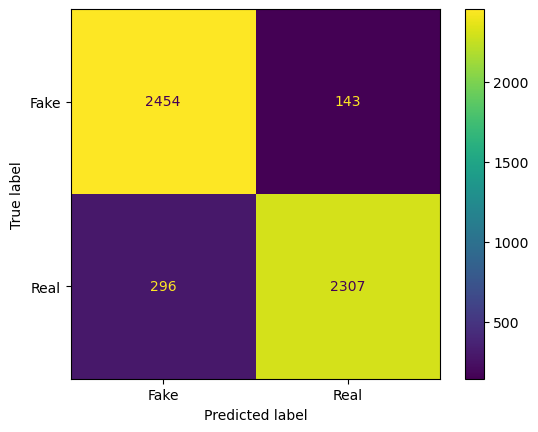

In [59]:
labels = ['Fake','Real']
result = confusion_matrix(y_test,svc_pred)
result
cmd = ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()

In [60]:
import pickle

In [62]:
with open('saved_model.pkl', 'wb') as file:
    pickle.dump(svc_model, file)

In [63]:
with open('saved_model.pkl', 'rb') as file:
    model = pickle.load(file)